# Fetch Rewards Coding Execise - Data Analyst


### Submitted by: Swaraj Panchal
### phone: +1 (312) 934-8576
### email: swarajpanchal2406@gmail.com
### linkedin: www.linkedin.com/in/swarajpanchal30 

#### Before we start the exercise, I have loaded all the necessary libraries that I will be using in this project.

In [1]:
import gzip      # to decompress our data
import shutil      # to use standard utility modules like copy()
import os      # to access our directory for the data
import pandas as pd      # to create dataframes 
import json      # to manage data that is in .json format
from ast import literal_eval      # to evaluate the data in string
from datetime import datetime      # to convert UTC data into standard date-time format

#### To load the data in my notebook, I have used gzip.open function. This will read the data files in my directory containing (.gz) and decompress it  

In [2]:
for i in os.listdir():
  if 'json' in i:
    with gzip.open(i, 'rb') as f_in:
          with open(i.replace('.gz',''), 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

#### Now that the data is decompressed, I have loaded the 3 data files naming them receipts, users, and brands respectively

In [3]:
receipts = pd.read_json('receipts.json',lines=True)
users = pd.read_json('users.json',lines=True)
brands = pd.read_json('brands.json',lines=True)

#### Now that the data has loaded, let's view the "receipts" data


### Receipts Data

In [4]:
receipts

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,{'$oid': '603cc0630a720fde100003e6'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614594147000},{'$date': 1614594147000},NaN,{'$date': 1614594148000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33
1115,{'$oid': '603d0b710a720fde1000042a'},NaN,NaN,{'$date': 1614613361873},{'$date': 1614613361873},NaN,{'$date': 1614613361873},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1116,{'$oid': '603cf5290a720fde10000413'},NaN,NaN,{'$date': 1614607657664},{'$date': 1614607657664},NaN,{'$date': 1614607657664},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1117,{'$oid': '603ce7100a7217c72c000405'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614604048000},{'$date': 1614604048000},NaN,{'$date': 1614604049000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33


#### First thoughts about the "receipts" data suggests that its columns contains dictionaries in them & some of them have more than 1 dictionaries in a value. So, we will need to format this data so that it can be expanded and can be easy to view. Also, I noticed that some of the date columns are in UTC format so there's a need to convert them into standard data-time format.

#### I will start off my converting the "_id" column. I will remove the key and would just keep the value in the row field for this columns

In [5]:
receipts['_id'] = receipts['_id'].apply(lambda x: x['$oid'])
receipts

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,603cc0630a720fde100003e6,25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614594147000},{'$date': 1614594147000},NaN,{'$date': 1614594148000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33
1115,603d0b710a720fde1000042a,NaN,NaN,{'$date': 1614613361873},{'$date': 1614613361873},NaN,{'$date': 1614613361873},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1116,603cf5290a720fde10000413,NaN,NaN,{'$date': 1614607657664},{'$date': 1614607657664},NaN,{'$date': 1614607657664},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1117,603ce7100a7217c72c000405,25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614604048000},{'$date': 1614604048000},NaN,{'$date': 1614604049000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33


#### Now since there are multiple columns in UTC format that needs to be converted, I will create a function that can be used by all columns

In [6]:
def date_convert(x):
    try:
        return(datetime.utcfromtimestamp(int(x['$date'])/1000).strftime('%Y-%m-%d %H:%M:%S'))
    except TypeError:
        return(None)
    
    
receipts['createDate'] = receipts['createDate'].apply(lambda x: date_convert(x))
receipts['dateScanned'] = receipts['dateScanned'].apply(lambda x: date_convert(x))
receipts['finishedDate'] = receipts['finishedDate'].apply(lambda x: date_convert(x))
receipts['modifyDate'] = receipts['modifyDate'].apply(lambda x: date_convert(x))
receipts['pointsAwardedDate'] = receipts['pointsAwardedDate'].apply(lambda x: date_convert(x))
receipts['purchaseDate'] = receipts['purchaseDate'].apply(lambda x: date_convert(x))

#### we can see that now the date columns have been converteed into standard data-time format

In [7]:
receipts

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,2021-01-03 00:00:00,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,None,2021-01-03 15:25:42,None,5.0,2021-01-03 00:00:00,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,2021-01-03 00:00:00,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 15:25:06,2021-01-03 15:25:06,2021-01-03 15:25:11,2021-01-03 15:25:11,2021-01-03 15:25:06,5.0,2021-01-02 15:25:06,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,603cc0630a720fde100003e6,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01 10:22:27,2021-03-01 10:22:27,None,2021-03-01 10:22:28,None,25.0,2020-08-17 00:00:00,2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33
1115,603d0b710a720fde1000042a,NaN,NaN,2021-03-01 15:42:41,2021-03-01 15:42:41,None,2021-03-01 15:42:41,None,NaN,None,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1116,603cf5290a720fde10000413,NaN,NaN,2021-03-01 14:07:37,2021-03-01 14:07:37,None,2021-03-01 14:07:37,None,NaN,None,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1117,603ce7100a7217c72c000405,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01 13:07:28,2021-03-01 13:07:28,None,2021-03-01 13:07:29,None,25.0,2020-08-17 00:00:00,2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33


#### Now the only column remaining to clean is the "rewardsReceiptItemList" one. By looking at the data we can see that it has multiple dictionaries in it.


#### So we will need to expand this column in such a way that all the key becomes columns and all the values becomes the row values in them.


#### I have started by using the explode() function to transform each element into a row

In [8]:
receipts = receipts.explode('rewardsReceiptItemList')
receipts.reset_index(inplace=True)

#### Below we can see that a lot of rows have been created as a result.

In [9]:
receipts

,index,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,2021-01-03 00:00:00,5.0,"{'barcode': '4011', 'description': 'ITEM NOT F...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,2.0,"{'barcode': '4011', 'description': 'ITEM NOT F...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,2.0,"{'barcode': '028400642255', 'description': 'DO...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
3,2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,None,2021-01-03 15:25:42,None,5.0,2021-01-03 00:00:00,1.0,"{'needsFetchReview': False, 'partnerItemId': '...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
4,3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,2021-01-03 00:00:00,4.0,"{'barcode': '4011', 'description': 'ITEM NOT F...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,1115,603d0b710a720fde1000042a,NaN,NaN,2021-03-01 15:42:41,2021-03-01 15:42:41,None,2021-03-01 15:42:41,None,NaN,None,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
7377,1116,603cf5290a720fde10000413,NaN,NaN,2021-03-01 14:07:37,2021-03-01 14:07:37,None,2021-03-01 14:07:37,None,NaN,None,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
7378,1117,603ce7100a7217c72c000405,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01 13:07:28,2021-03-01 13:07:28,None,2021-03-01 13:07:29,None,25.0,2020-08-17 00:00:00,2.0,"{'barcode': 'B076FJ92M4', 'description': 'muel...",REJECTED,34.96,5fc961c3b8cfca11a077dd33
7379,1117,603ce7100a7217c72c000405,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01 13:07:28,2021-03-01 13:07:28,None,2021-03-01 13:07:29,None,25.0,2020-08-17 00:00:00,2.0,"{'barcode': 'B07BRRLSVC', 'description': 'thin...",REJECTED,34.96,5fc961c3b8cfca11a077dd33


#### Now, since there are a lot of NaN values, I will replace them with an empty dictionary.

In [10]:
receipts = receipts.fillna({'rewardsReceiptItemList':'{}'})

#### And now since we want string values, I will pass the values in str(x) function to get a string representation. And then will the "literal_eval" function to safely evaluate the string. 

In [11]:
receipts['rewardsReceiptItemList'] = receipts['rewardsReceiptItemList'].apply(lambda x:str(x))
receipts['rewardsReceiptItemList'] = receipts['rewardsReceiptItemList'].apply(literal_eval)

#### After using the pandas.json_normalize() function, we can flatten the json data into a table format.

In [12]:
receipts_items = pd.json_normalize(receipts['rewardsReceiptItemList'],errors='ignore',record_prefix='rewardsReceiptItemList')\
.add_prefix('rewardsReceiptItemList.')

#### Now, we can see that the number of columns have been increased. 


#### For Example, the 'Barcode' key in "rewardsReceiptItemList" column has now become a column named "rewardsReceiptList.barcode"

In [13]:
receipts_items

,rewardsReceiptItemList.barcode,rewardsReceiptItemList.description,rewardsReceiptItemList.finalPrice,rewardsReceiptItemList.itemPrice,rewardsReceiptItemList.needsFetchReview,rewardsReceiptItemList.partnerItemId,rewardsReceiptItemList.preventTargetGapPoints,rewardsReceiptItemList.quantityPurchased,rewardsReceiptItemList.userFlaggedBarcode,rewardsReceiptItemList.userFlaggedNewItem,...,rewardsReceiptItemList.itemNumber,rewardsReceiptItemList.originalMetaBriteQuantityPurchased,rewardsReceiptItemList.pointsEarned,rewardsReceiptItemList.targetPrice,rewardsReceiptItemList.competitiveProduct,rewardsReceiptItemList.originalFinalPrice,rewardsReceiptItemList.originalMetaBriteItemPrice,rewardsReceiptItemList.deleted,rewardsReceiptItemList.priceAfterCoupon,rewardsReceiptItemList.metabriteCampaignId
0,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7378,B076FJ92M4,mueller austria hypergrind precision electric ...,22.97,22.97,NaN,0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,NaN
7379,B07BRRLSVC,thindust summer face mask - sun protection nec...,11.99,11.99,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,NaN


#### Above, we see that the "_id" column is missing, we would need this "_id" to relate the receipt list items.

In [14]:
receipts_items['_id'] = receipts['_id']
receipts_items

,rewardsReceiptItemList.barcode,rewardsReceiptItemList.description,rewardsReceiptItemList.finalPrice,rewardsReceiptItemList.itemPrice,rewardsReceiptItemList.needsFetchReview,rewardsReceiptItemList.partnerItemId,rewardsReceiptItemList.preventTargetGapPoints,rewardsReceiptItemList.quantityPurchased,rewardsReceiptItemList.userFlaggedBarcode,rewardsReceiptItemList.userFlaggedNewItem,...,rewardsReceiptItemList.originalMetaBriteQuantityPurchased,rewardsReceiptItemList.pointsEarned,rewardsReceiptItemList.targetPrice,rewardsReceiptItemList.competitiveProduct,rewardsReceiptItemList.originalFinalPrice,rewardsReceiptItemList.originalMetaBriteItemPrice,rewardsReceiptItemList.deleted,rewardsReceiptItemList.priceAfterCoupon,rewardsReceiptItemList.metabriteCampaignId,_id
0,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1eb0a720f0523000575
1,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1bb0a720f052300056b
2,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1bb0a720f052300056b
3,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1f10a720f052300057a
4,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1ee0a7214ada100056f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,603d0b710a720fde1000042a
7377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,603cf5290a720fde10000413
7378,B076FJ92M4,mueller austria hypergrind precision electric ...,22.97,22.97,NaN,0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,NaN,603ce7100a7217c72c000405
7379,B07BRRLSVC,thindust summer face mask - sun protection nec...,11.99,11.99,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,NaN,603ce7100a7217c72c000405


#### we can see that the id column has been added at the end

In [15]:
receipts_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 35 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   rewardsReceiptItemList.barcode                             3090 non-null   object 
 1   rewardsReceiptItemList.description                         6560 non-null   object 
 2   rewardsReceiptItemList.finalPrice                          6767 non-null   object 
 3   rewardsReceiptItemList.itemPrice                           6767 non-null   object 
 4   rewardsReceiptItemList.needsFetchReview                    813 non-null    object 
 5   rewardsReceiptItemList.partnerItemId                       6941 non-null   object 
 6   rewardsReceiptItemList.preventTargetGapPoints              358 non-null    object 
 7   rewardsReceiptItemList.quantityPurchased                   6767 non-null   float64
 8   rewardsR

### Users Data

In [16]:
users

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
...,...,...,...,...,...,...,...
490,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
491,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
492,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
493,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN


#### Just like the "Receipts" data we can see that we will require some data cleaning for "users" data as well


#### We will clean the "_id" column and use the 'date_convert' function to convert into standard data-time format

In [17]:
users['_id'] = users['_id'].apply(lambda x: x['$oid'])
users['createdDate'] = users['createdDate'].apply(lambda x: date_convert(x))
users['lastLogin'] = users['lastLogin'].apply(lambda x: date_convert(x))

In [18]:
users

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 15:25:30,2021-01-03 15:25:30,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04,2021-01-03 15:25:37,consumer,Email,WI
...,...,...,...,...,...,...,...
490,54943462e4b07e684157a532,True,2014-12-19 14:21:22,2021-03-05 16:52:23,fetch-staff,NaN,NaN
491,54943462e4b07e684157a532,True,2014-12-19 14:21:22,2021-03-05 16:52:23,fetch-staff,NaN,NaN
492,54943462e4b07e684157a532,True,2014-12-19 14:21:22,2021-03-05 16:52:23,fetch-staff,NaN,NaN
493,54943462e4b07e684157a532,True,2014-12-19 14:21:22,2021-03-05 16:52:23,fetch-staff,NaN,NaN


### Brands Data

In [19]:
brands

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827
...,...,...,...,...,...,...,...,...
1162,{'$oid': '5f77274dbe37ce6b592e90c0'},511111116752,Baking,BAKING,"{'$ref': 'Cogs', '$id': {'$oid': '5f77274dbe37...",test brand @1601644365844,NaN,NaN
1163,{'$oid': '5dc1fca91dda2c0ad7da64ae'},511111706328,Breakfast & Cereal,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '53e10d6368ab...",Dippin Dots® Cereal,NaN,DIPPIN DOTS CEREAL
1164,{'$oid': '5f494c6e04db711dd8fe87e7'},511111416173,Candy & Sweets,CANDY_AND_SWEETS,"{'$ref': 'Cogs', '$id': {'$oid': '5332fa12e4b0...",test brand @1598639215217,NaN,TEST BRANDCODE @1598639215217
1165,{'$oid': '5a021611e4b00efe02b02a57'},511111400608,Grocery,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5332f5f6e4b0...",LIPTON TEA Leaves,0.0,LIPTON TEA Leaves


#### Much like "Receipts" and "Users" data, the "Brands" data will require the same data cleaning and transformation process. Here, the column 'cpg' has more than one dictionaries in it much like 'rewardsReceiptItemList' in the 'Reviews' data.

In [20]:
brands_flat = pd.json_normalize(brands['cpg'])
brands_flat = brands_flat.add_prefix('cpg.')

In [21]:
brands_flat

,cpg.$ref,cpg.$id.$oid
0,Cogs,601ac114be37ce2ead437550
1,Cogs,5332f5fbe4b03c9a25efd0ba
2,Cogs,601ac142be37ce2ead437559
3,Cogs,601ac142be37ce2ead437559
4,Cogs,5332fa12e4b03c9a25efd1e7
...,...,...
1162,Cogs,5f77274dbe37ce6b592e90bf
1163,Cogs,53e10d6368abd3c7065097cc
1164,Cogs,5332fa12e4b03c9a25efd1e7
1165,Cogs,5332f5f6e4b03c9a25efd0b4


In [22]:
brands = pd.merge(brands, brands_flat, left_index=True, right_index=True, how='outer')

In [23]:
brands

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode,cpg.$ref,cpg.$id.$oid
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN,Cogs,601ac114be37ce2ead437550
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS,Cogs,5332f5fbe4b03c9a25efd0ba
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,Cogs,601ac142be37ce2ead437559
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,Cogs,601ac142be37ce2ead437559
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,Cogs,5332fa12e4b03c9a25efd1e7
...,...,...,...,...,...,...,...,...,...,...
1162,{'$oid': '5f77274dbe37ce6b592e90c0'},511111116752,Baking,BAKING,"{'$ref': 'Cogs', '$id': {'$oid': '5f77274dbe37...",test brand @1601644365844,NaN,NaN,Cogs,5f77274dbe37ce6b592e90bf
1163,{'$oid': '5dc1fca91dda2c0ad7da64ae'},511111706328,Breakfast & Cereal,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '53e10d6368ab...",Dippin Dots® Cereal,NaN,DIPPIN DOTS CEREAL,Cogs,53e10d6368abd3c7065097cc
1164,{'$oid': '5f494c6e04db711dd8fe87e7'},511111416173,Candy & Sweets,CANDY_AND_SWEETS,"{'$ref': 'Cogs', '$id': {'$oid': '5332fa12e4b0...",test brand @1598639215217,NaN,TEST BRANDCODE @1598639215217,Cogs,5332fa12e4b03c9a25efd1e7
1165,{'$oid': '5a021611e4b00efe02b02a57'},511111400608,Grocery,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5332f5f6e4b0...",LIPTON TEA Leaves,0.0,LIPTON TEA Leaves,Cogs,5332f5f6e4b03c9a25efd0b4


In [24]:
brands['_id'] = brands['_id'].apply(lambda x: x['$oid'])

In [25]:
brands

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode,cpg.$ref,cpg.$id.$oid
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN,Cogs,601ac114be37ce2ead437550
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS,Cogs,5332f5fbe4b03c9a25efd0ba
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,Cogs,601ac142be37ce2ead437559
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,Cogs,601ac142be37ce2ead437559
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,Cogs,5332fa12e4b03c9a25efd1e7
...,...,...,...,...,...,...,...,...,...,...
1162,5f77274dbe37ce6b592e90c0,511111116752,Baking,BAKING,"{'$ref': 'Cogs', '$id': {'$oid': '5f77274dbe37...",test brand @1601644365844,NaN,NaN,Cogs,5f77274dbe37ce6b592e90bf
1163,5dc1fca91dda2c0ad7da64ae,511111706328,Breakfast & Cereal,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '53e10d6368ab...",Dippin Dots® Cereal,NaN,DIPPIN DOTS CEREAL,Cogs,53e10d6368abd3c7065097cc
1164,5f494c6e04db711dd8fe87e7,511111416173,Candy & Sweets,CANDY_AND_SWEETS,"{'$ref': 'Cogs', '$id': {'$oid': '5332fa12e4b0...",test brand @1598639215217,NaN,TEST BRANDCODE @1598639215217,Cogs,5332fa12e4b03c9a25efd1e7
1165,5a021611e4b00efe02b02a57,511111400608,Grocery,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5332f5f6e4b0...",LIPTON TEA Leaves,0.0,LIPTON TEA Leaves,Cogs,5332f5f6e4b03c9a25efd0b4


#### So after cleaning the json.gz data files, I have created a simplified Structured Relational Data Model. Since, this is just a test assessment I have simplified and normalized it further.

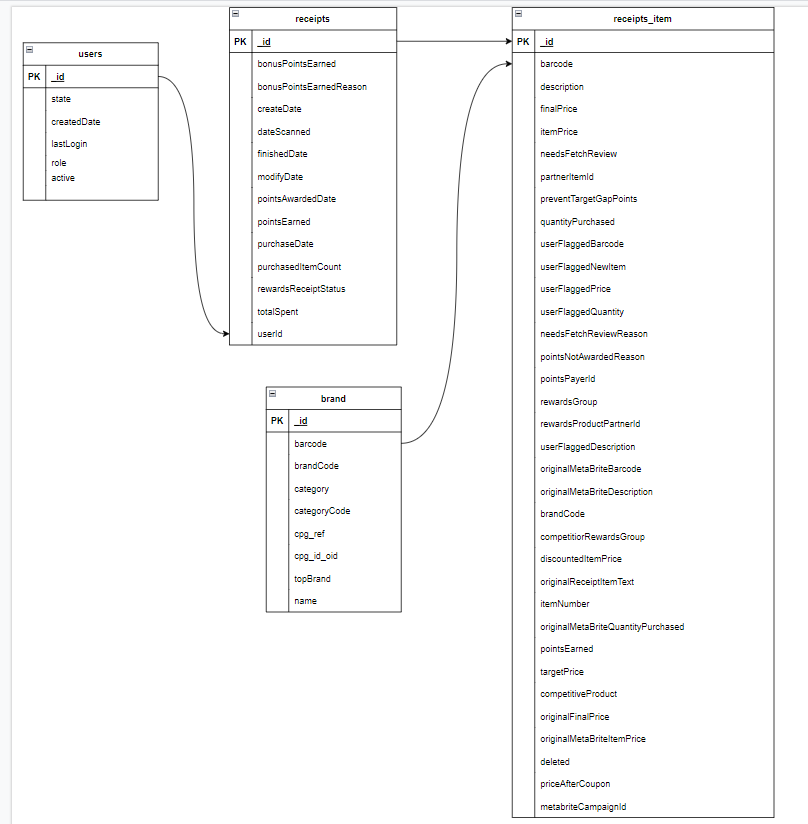